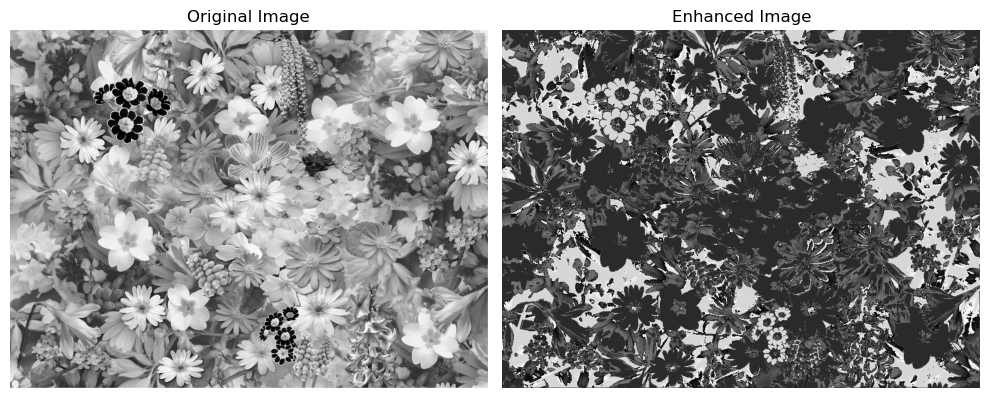

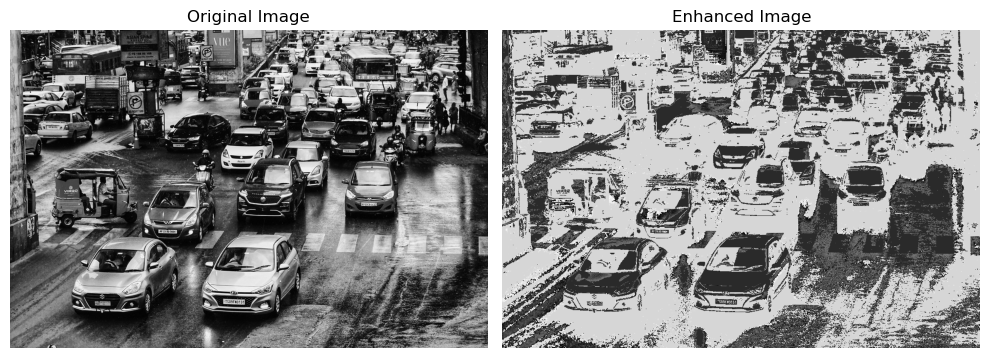

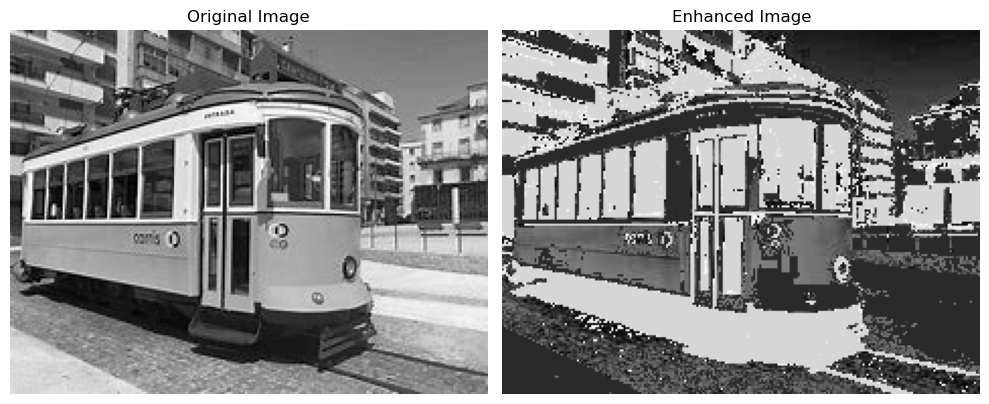

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_image(img):
    L = 256  # 8-bit grayscale image

    # Create an empty image with the same dimensions for the output
    enhanced_img = np.zeros_like(img)

    # Define the conditions and apply the transformations
    cond1 = img < L/3
    cond2 = (img >= L/3) & (img < 2*L/3)
    cond3 = img >= 2*L/3

    enhanced_img[cond1] = 5*L/6
    enhanced_img[cond2] = 2*img[cond2] + L/6
    enhanced_img[cond3] = L/6

    return enhanced_img

def process_display_and_save_image(image_path, output_folder):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"Error: Couldn't load the image {image_path}.")
        return

    enhanced_img = enhance_image(img)

    # Display in Jupyter Notebook
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_img, cmap='gray')
    plt.title('Enhanced Image')
    plt.axis('off')
    
    # Save the enhanced image to the output folder
    base_name = os.path.basename(image_path)
    file_name_without_extension = os.path.splitext(base_name)[0]
    new_file_name = f"{file_name_without_extension}_enhanced.jpg"
    
    output_path = os.path.join(output_folder, new_file_name)
    cv2.imwrite(output_path, enhanced_img)

    plt.tight_layout()
    plt.show()

# Ensure the output folder exists, if not create it
output_folder = "enhanced_images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

image_list = ["../original_images/flower.jpg","../original_images/traffic.jpg","../original_images/tram.jpg"]

for image in image_list:
    process_display_and_save_image(image, output_folder)
